In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_long.csv")

In [15]:
df

,Unnamed: 0,V1,time,country,valence,sky,temperature
0,1,201801,1,us,0.448499,0.300845,31.735123
1,2,201802,2,us,0.451689,0.464499,40.175188
2,3,201803,3,us,0.457356,0.413125,38.659179
3,4,201804,4,us,0.450445,0.429780,46.883231
4,5,201805,5,us,0.443891,0.445743,62.349299
...,...,...,...,...,...,...,...
619,620,201908,20,pl,0.520308,0.357429,70.527016
620,621,201909,21,pl,0.509592,0.481951,58.511142
621,622,201910,22,pl,0.505745,0.471493,52.165323
622,623,201911,23,pl,0.507326,0.690528,43.534260


In [4]:
df.describe()

,Unnamed: 0,V1,time,valence,sky,temperature
count,624.000000,624.000000,624.00000,615.000000,614.000000,614.000000
mean,312.500000,201856.500000,12.50000,0.494058,0.369704,53.474747
std,180.277564,50.159233,6.92774,0.041234,0.129444,13.970286
min,1.000000,201801.000000,1.00000,0.420378,0.156288,16.245306
25%,156.750000,201806.750000,6.75000,0.467461,0.266932,42.767139
50%,312.500000,201856.500000,12.50000,0.487953,0.336025,53.558806
75%,468.250000,201906.250000,18.25000,0.509903,0.465335,64.830948
max,624.000000,201912.000000,24.00000,0.651504,0.791588,83.591326


In [5]:
df.isna().sum()

Unnamed: 0      0
V1              0
time            0
country         0
valence         9
sky            10
temperature    10
dtype: int64

In [28]:
df[df["valence"].isna()]

,Unnamed: 0,V1,time,country,valence,sky,temperature
456,457,201801,1,cz,NaN,0.469197,37.130051
457,458,201802,2,cz,NaN,0.491138,27.449864
458,459,201803,3,cz,NaN,0.536724,34.494699
459,460,201804,4,cz,NaN,0.368036,55.792199
460,461,201805,5,cz,NaN,0.339643,61.973913
461,462,201806,6,cz,NaN,0.381329,64.282833
462,463,201807,7,cz,NaN,0.278602,69.732331
463,464,201808,8,cz,NaN,0.277287,71.270883
464,465,201809,9,cz,NaN,0.404950,60.406357


In [29]:
df[df["sky"].isna()]

,Unnamed: 0,V1,time,country,valence,sky,temperature
576,577,201801,1,tr,0.514089,NaN,NaN
577,578,201802,2,tr,0.497612,NaN,NaN
578,579,201803,3,tr,0.492198,NaN,NaN
579,580,201804,4,tr,0.486820,NaN,NaN
580,581,201805,5,tr,0.487611,NaN,NaN
581,582,201806,6,tr,0.475874,NaN,NaN
582,583,201807,7,tr,0.466103,NaN,NaN
583,584,201808,8,tr,0.454274,NaN,NaN
584,585,201809,9,tr,0.455291,NaN,NaN
585,586,201810,10,tr,0.460521,NaN,NaN


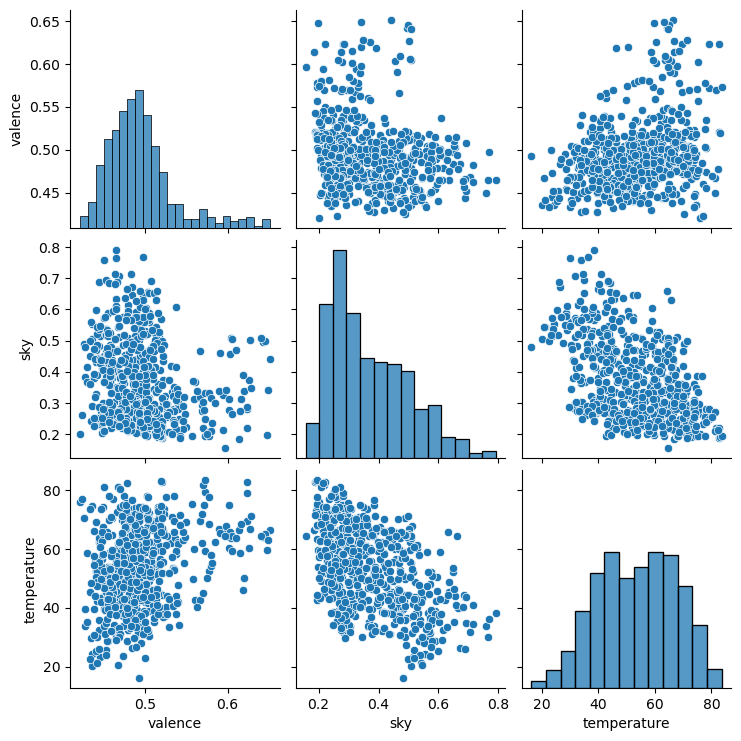

In [10]:
sns.pairplot(data=df,vars = ["valence","sky","temperature"])

In [13]:
df.corr()

,Unnamed: 0,V1,time,valence,sky,temperature
Unnamed: 0,1.000000,0.034550,0.038428,0.109396,-0.143260,0.179966
V1,0.034550,1.000000,0.899068,0.110325,-0.000224,0.021778
time,0.038428,0.899068,1.000000,0.156865,0.000455,0.121074
valence,0.109396,0.110325,0.156865,1.000000,-0.159713,0.287424
sky,-0.143260,-0.000224,0.000455,-0.159713,1.000000,-0.507725
temperature,0.179966,0.021778,0.121074,0.287424,-0.507725,1.000000


In [31]:
print(f'Unique countries {df["country"].unique()}')
print(f'Value counts per country')
df["country"].value_counts()

Unique countries ['us' 'no' 'ca' 'be' 'se' 'is' 'ch' 'it' 'gb' 'de' 'fr' 'fi' 'nl' 'es'
 'mx' 'pt' 'at' 'jp' 'ie' 'cz' 'sk' 'hu' 'dk' 'gr' 'tr' 'pl']
Value counts per country


us    24
no    24
tr    24
gr    24
dk    24
hu    24
sk    24
cz    24
ie    24
jp    24
at    24
pt    24
mx    24
es    24
nl    24
fi    24
fr    24
de    24
gb    24
it    24
ch    24
is    24
se    24
be    24
ca    24
pl    24
Name: country, dtype: int64